In [ ]:
import pandas as pd
import numpy as np
from ast import literal_eval

# Load the CSV file
data = pd.read_csv("complete_fixed_filtered_char_color.csv")

# Drop columns safely
columns_to_drop = ["Unnamed: 0.1", "test", "Unnamed: 0"]
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns], errors='ignore')

# Convert string representations of lists/dictionaries to Python objects
data['colors'] = data['colors'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)

# Display the first few rows
data.head()

,jp_title,char_name,fav,img,colors
0,Horimiya,Izumi Miyamura (宮村 伊澄),16137,https://cdn.myanimelist.net/images/characters/...,"[[194, 222, 249], [185, 220, 250], [177, 200, ..."
1,Horimiya,Kyouko Hori (堀 京子),12528,https://cdn.myanimelist.net/images/characters/...,"[[220, 237, 253], [208, 227, 250], [192, 203, ..."
2,Horimiya,Yuki Yoshikawa (吉川 由紀),1502,https://cdn.myanimelist.net/images/characters/...,"[[195, 219, 249], [158, 226, 245], [141, 216, ..."
3,Mushoku Tensei: Isekai Ittara Honki Dasu,Rudeus Greyrat (ルーデウス・グレイラット),10221,https://cdn.myanimelist.net/images/characters/...,"[[221, 234, 246], [179, 215, 251], [140, 207, ..."
4,Mushoku Tensei: Isekai Ittara Honki Dasu,Roxy Migurdia (ロキシー・ミグルディア),9320,https://cdn.myanimelist.net/images/characters/...,"[[215, 231, 239], [182, 206, 247], [162, 196, ..."


In [4]:
# Flatten all color lists (ensure each row is a 30x3 list)
all_colors = np.array([color for sublist in data['colors'] if isinstance(sublist, list) for color in sublist])

print("Number of character:", len(data['colors'])) 
print("Expected shape:", (len(data['colors'])*30, 3))
print("Real color", all_colors.shape)
print("Flatten:", 9240*3)

Number of character: 308
Expected shape: (9240, 3)
Real color (9240, 3)
Flatten: 27720


In [6]:
import pandas as pd
import numpy as np

list_color = []

for character_color in data['colors']:
    if isinstance(character_color, list):  
        list_color.extend(character_color)  

used_colors = np.array(list_color)

# Convert to a DataFrame with R, G, B columns
df_colors = pd.DataFrame(used_colors, columns=['R', 'G', 'B'])



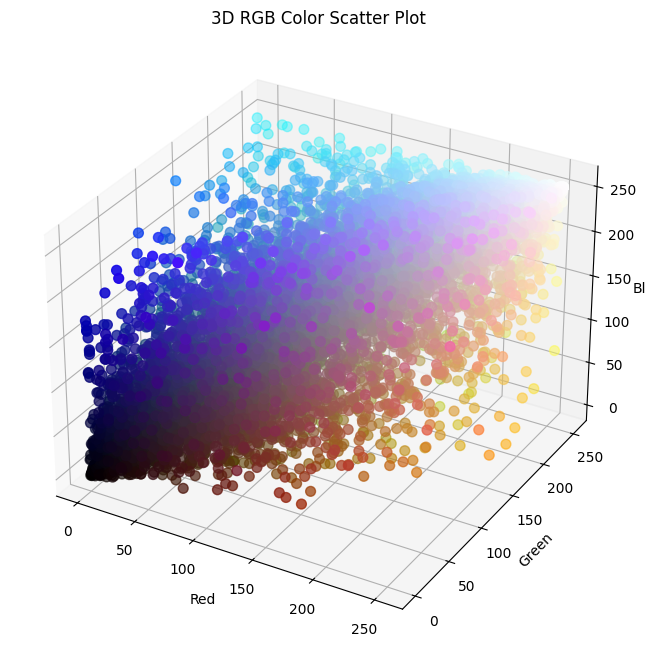

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter points using RGB values as both coordinates and colors
ax.scatter(df_colors['R'], df_colors['G'], df_colors['B'], 
           c=df_colors[['R', 'G', 'B']].values / 255,  # Normalize RGB values
           marker='o', s=50)

# Labels and title
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('3D RGB Color Scatter Plot')

plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11092\537023688.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_colors = df_colors.groupby('cluster').apply(lambda x: x.sample(n=min(num_samples_per_cluster, len(x)), random_state=42))


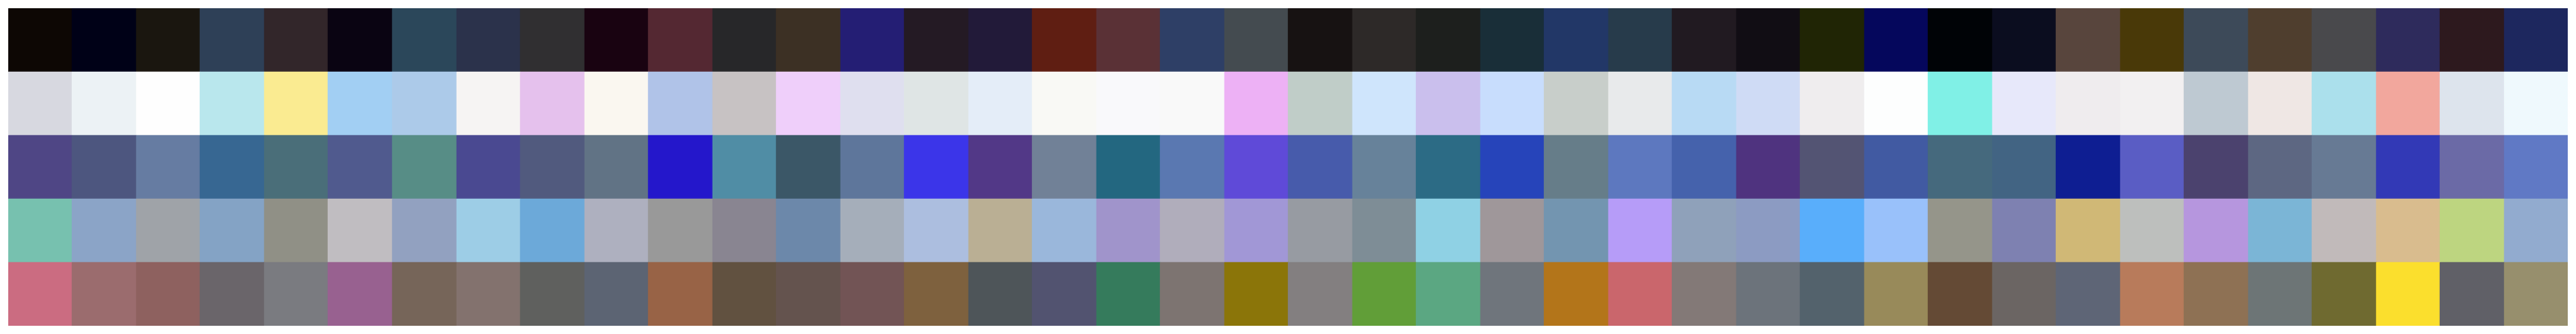

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Parameters
num_clusters = 5
num_samples_per_cluster = 40  # Change this value to adjust samples per cluster

# Fit KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df_colors['cluster'] = kmeans.fit_predict(df_colors[['R', 'G', 'B']])

# Sample colors from each cluster
sampled_colors = df_colors.groupby('cluster').apply(lambda x: x.sample(n=min(num_samples_per_cluster, len(x)), random_state=42))

# Reset index
sampled_colors = sampled_colors.reset_index(drop=True)

# Visualization settings
fig, ax = plt.subplots(figsize=(num_samples_per_cluster, num_clusters))  # Adjust figure size dynamically
ax.set_xlim(0, num_samples_per_cluster)  # Number of colors per row
ax.set_ylim(0, num_clusters)  # Number of clusters
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Draw color palette
for i in range(num_clusters):  # Iterate over clusters
    for j in range(num_samples_per_cluster):  # Iterate over sampled colors
        index = i * num_samples_per_cluster + j
        if index < len(sampled_colors):  # Ensure we don’t go out of bounds
            color = sampled_colors.iloc[index][['R', 'G', 'B']].values.astype(int) / 255  # Normalize
            rect = plt.Rectangle((j, num_clusters - i - 1), 1, 1, color=color)
            ax.add_patch(rect)

plt.show()


In [88]:
df_colors.value_counts()[:10]

R    G    B    cluster
254  254  254  1          66
253  254  254  1          13
     253  253  1           5
251  252  252  1           5
252  252  253  1           5
254  253  254  1           4
251  253  253  1           4
253  253  254  1           3
244  245  245  1           3
250  250  250  1           3
Name: count, dtype: int64

In [62]:
all_colors.shape

(17490, 3)

In [59]:
all_colors.reshape(52470,3)

ValueError: cannot reshape array of size 52470 into shape (52470,3)

In [50]:
type(data['colors'][0])

list